## Youtube video :

https://www.youtube.com/watch?v=cGUjiHyQWPk

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Making some 1D data :

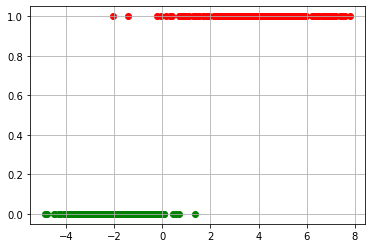

In [171]:
mu1,mu2 = np.random.normal(2,4,2)
mu1,mu2 = np.sort((mu1,mu2))
sigma1,sigma2 = np.random.uniform(1,2,2)
n1,n2 = np.random.randint(200,225,2)

x1 = np.random.normal(mu1,sigma1,n1)
x2 = np.random.normal(mu2,sigma2,n2)
x = np.hstack((x1,x2))
y = [0]* n1 + [1] * n2
plt.grid();
plt.scatter(x1,[0]*n1,c='g');
plt.scatter(x2,[1]*n2,c='r');

x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle = True,test_size=.25)

## Sigmoïd function :
The standard sigmoïd function is defined by :
$$ f(x) = \frac{1}{1+\exp^{-x}}$$


and its derivative :

$$f'(x) = f(x)(1-f(x))$$

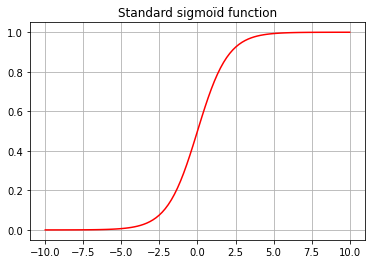

In [172]:
def f(x):
    return 1/(1+np.exp(-x))

def df(x):
    return f(x)*(1-f(x))



xx = np.linspace(-10,10,100)
plt.plot(xx,1/(1+np.exp(-xx)),c='r');
plt.grid()
plt.title('Standard sigmoïd function');

We are looking for a sigmoïdal classifier of the form :

$$ h(x,\alpha,\beta) = f(\beta(x-\alpha))$$

which gradient is :

$$\nabla h(\alpha,\beta) = \left( -\beta f'(\beta(x-\alpha)), (x-\alpha)f'(\beta(x-\alpha) \right)^T$$

In order to obtain a good classifier $h$, we want it to maximize the likelihood :


$$ \mathcal{L}(h) = \prod_{i |y_i = 1} h(x_i) \prod_{i | y_i = 0}(1-h(x_i))$$

Or, more simply, its logarithm :

$$ \log(\mathcal{L}(h)) = \sum_{i |y_i = 1} \log(h(x_i)) + \sum_{i | y_i = 0}\log(1-h(x_i))$$

that we can rewrite :

$$ \log(\mathcal{L}(h)) = \sum_i y_i\log(h(x_i)) + (1-y_i)\log(1-h(x_i))$$

Let's calculate it's gradient w.r. to $\alpha$ and $\beta$. We have :

$$
\begin{align}
\frac{\partial}{\partial \alpha} \log h(x_i) &= \frac{\partial h(x_i)}{\partial \alpha} \frac{1}{h(x_i)} \\
&= \frac{-\beta f'(\beta(x_i-\alpha))}{h(x_i)} \\
&= \frac{-\beta f'(\beta(x_i-\alpha))}{f(\beta(x_i-\alpha))} \\
\end{align}
$$

and :

$$
\begin{align}
\frac{\partial}{\partial \beta} \log h(x_i) &= \frac{\partial h(x_i)}{\partial \beta} \frac{1}{h(x_i)} \\
&= \frac{(x_i-\alpha) f'(\beta(x_i-\alpha))}{h(x_i)} \\
&= \frac{(x_i-\alpha) f'(\beta(x_i-\alpha))}{f(\beta(x_i-\alpha))} \\
\end{align}
$$

In [173]:
def grad_L(theta,x,y):
    alpha,beta = theta
    grad = np.zeros(2)
    for xi,yi in zip(x,y):
        grad[0] +=       yi  *(-beta * df(beta*(xi-alpha))) / f(beta*(xi-alpha)) +\
                    (1 - yi) *( beta * df(beta*(xi-alpha)))/(1 - f(beta*(xi-alpha)) )
        grad[1] +=       yi  *( (xi-alpha) * df(beta*(xi-alpha))) / f(beta*(xi-alpha)) +\
                    (1 - yi) *(-(xi-alpha) * df(beta*(xi-alpha)))/(1 - f(beta*(xi-alpha)) )
    return grad

## Likelihood maximization via gradient descent :

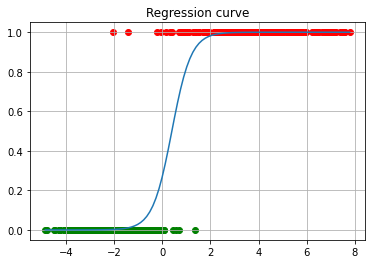

In [174]:
epsilon = 1e-1
lr = 0.01
theta = np.ones(2)*.5
g = grad_L(theta,x_train,y_train)

while np.linalg.norm(g) > epsilon :
    g = grad_L(theta,x_train,y_train)
    theta += lr * g

alpha, beta = theta

plt.scatter(x1,[0]*n1,c='g');
plt.scatter(x2,[1]*n2,c='r');
xx = np.linspace(x.min(),x.max(),100)
plt.plot(xx,f(beta*(xx-alpha)))
plt.grid();
plt.title("Regression curve");

## Choosing the right threshold :

This really depends the nature of the task we are trying to solve.

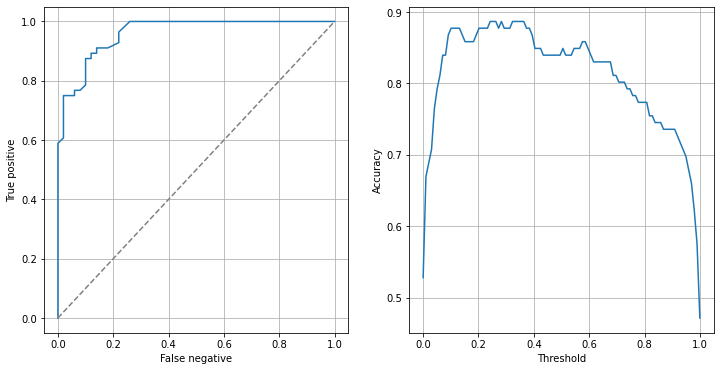

In [167]:
thresholds  = np.linspace(0,1,100)
accuracys = []
tp_rates = []
tn_rates = []
for th in thresholds:
    y_pred = (f(beta*(x_test-alpha)) >= th)*1
    accuracys.append(accuracy_score(y_pred,y_test))
    cm = confusion_matrix(y_test,y_pred)
    tp = cm[1,1]/(cm[1,1]+cm[1,0])
    tn = 1-cm[0,0]/(cm[0,0]+cm[0,1])
    tp_rates.append(tp)
    tn_rates.append(tn)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.grid()
plt.plot(tn_rates,tp_rates);
plt.xlabel("False negative");
plt.ylabel("True positive");
plt.plot(thresholds,thresholds,linestyle='--',c='grey');

plt.subplot(122)
plt.grid()
plt.plot(thresholds,accuracys);
plt.xlabel("Threshold");
plt.ylabel("Accuracy");